# Sentiment and Time Series Analysis of Musical Intruments Products of Amazon

Importing All the Libraries Required


In [1]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # Asign correlation between the features
import scipy.sparse                                                 #
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds                                #
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data                                 # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import mean_squared_error                      # To check the mean square error 

Parsing the JSON.GZ file to Python to get a Pandas Dataframe To Work On

In [2]:
def parse(path):                   # Creating Function
  g = gzip.open(path, 'rb')        # opens the compressed format file
  for l in g:
    yield eval(l)                  # Returns eval(l)

def getDF(path):                   # Creating Function getDF
  i = 0
  df = {}                          # Creating empty dictionary
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')         # .from_dict creates DataFrame object from dictionary by columns or by index allowing dtype specification.
false=False
true=True
#importing the metadata of software products
df = getDF('D:\Study\Minor Projects\Sales-Sentiment-Forcasting-Project\Dataset\meta_Musical_Instruments.json.gz')
# importing the software reviews of metadata
df1 = getDF('D:\Study\Minor Projects\Sales-Sentiment-Forcasting-Project\Dataset\Musical_Instruments_reviews.json.gz')


Checking the shape and starting entries of metadata

In [3]:
df.shape

(120310, 19)

In [4]:
df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Musical Instruments, Drums & Percussion, Hand...",,[Cricket Rubbing the spine with the wooden sti...,,Wooden Percussion 2 Piece Set of 3 Inch Cricke...,"[B00NP8GYVS, B00NP80XMO, B00NP8M098]",,WADSUWAN SHOP,"[Wood percussion, Owl whistle*, Includes woode...","[>#141,729 in Musical Instruments (See Top 100...",[],Musical Instruments,,"December 2, 2013",,0000989983,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Musical Instruments, Drums & Percussion, Hand...",,[Frog - Rubbing its spine with the wooden stic...,,"Wooden Percussion 3 Piece Set Frog, Cricket an...","[B00NP8GYVS, B00NP80XMO, B01MY48HK5, B00AZZ1AJ...",,WADSUWAN SHOP,"[Wood percussion, Small 3 inches, Creates orig...","[>#1,622 in Musical Instruments (See Top 100 i...",[],Musical Instruments,,"December 2, 2013",$0.91,0000098906,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Musical Instruments, Instrument Accessories, ...",,[Vivaldi's famous set of four violin concertos...,,Hal Leonard Vivaldi Four Seasons for Piano (Or...,[],,Hal Leonard,"[., ., .]","[>#330,653 in Musical Instruments (See Top 100...",[],Musical Instruments,,"May 10, 2011",$62.93,0041291905,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,[],,"[The Turn of the Screw (op. 54) vocal score, p...",,The Turn of the Screw (vocal score),"[0486266842, 0793507669, 0393008789, 142341280...",,Boosey &amp; Hawkes,[],"[>#86,354 in Musical Instruments (See Top 100 ...",[],Musical Instruments,,"May 23, 2007",$107.79,0060015500,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,[],,[],,Suite for Organ (including the Trumpet Volunta...,[],,,[],"[>#482,025 in Musical Instruments (See Top 100...",[],Musical Instruments,,"February 8, 2013",,0193757710,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


Checking the shape and entries of Review Data

In [5]:
df1.shape

(1512530, 12)

In [6]:
df1.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,90,False,"08 9, 2004",AXHY24HWOF184,0470536454,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,1092009600,NaN
1,4.0,2,True,"04 6, 2017",A29OWR79AM796H,0470536454,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,1491436800,NaN
2,5.0,NaN,True,"03 14, 2017",AUPWU27A7X5F6,0470536454,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,1489449600,NaN
3,4.0,NaN,True,"02 14, 2017",A1N69A47D4JO6K,0470536454,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,1487030400,NaN
4,5.0,NaN,True,"01 29, 2017",AHTIQUMVCGBFJ,0470536454,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,1485648000,NaN


Making New Dataframe with the required features of the SOftware Metadata dataset

In [7]:
data2 = df[['asin', 'title', 'category', 'price', 'brand']]
data2.head()

,asin,title,category,price,brand
0,0000989983,Wooden Percussion 2 Piece Set of 3 Inch Cricke...,"[Musical Instruments, Drums & Percussion, Hand...",,WADSUWAN SHOP
1,0000098906,"Wooden Percussion 3 Piece Set Frog, Cricket an...","[Musical Instruments, Drums & Percussion, Hand...",$0.91,WADSUWAN SHOP
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,"[Musical Instruments, Instrument Accessories, ...",$62.93,Hal Leonard
3,0060015500,The Turn of the Screw (vocal score),[],$107.79,Boosey &amp; Hawkes
4,0193757710,Suite for Organ (including the Trumpet Volunta...,[],,


Making a new dataframe with the required features from Software reviews dataset

In [8]:
data1 = df1[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime']]

Merging the two dataframes with the product id

In [9]:
H_data = pd.merge(data1, data2, on = 'asin')
H_data.head(5)

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand
0,0470536454,Crocheting for Dummies by Karen Manthey & Susa...,Bendy,5.0,1092009600,"08 9, 2004",Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
1,0470536454,Very helpful...,Amazon Customer,4.0,1491436800,"04 6, 2017",Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
2,0470536454,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Amazon Customer,5.0,1489449600,"03 14, 2017",Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
3,0470536454,My girlfriend use quite often,Christopher Burnett,4.0,1487030400,"02 14, 2017",Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
4,0470536454,Arrived as described. Very happy.,Amazon Customer,5.0,1485648000,"01 29, 2017",Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing


Converting the recorded reviewTime(Date on which the review was recorded) into a datetime 

In [10]:
H_data["reviewTime"] = pd.to_datetime(H_data["reviewTime"])

In [11]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731703 entries, 0 to 1731702
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   asin            object        
 1   reviewText      object        
 2   reviewerName    object        
 3   overall         float64       
 4   unixReviewTime  int64         
 5   reviewTime      datetime64[ns]
 6   title           object        
 7   category        object        
 8   price           object        
 9   brand           object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 145.3+ MB


Checking out the new dataframe created by merging others

In [12]:
H_data.shape

(1731703, 10)

In [13]:
H_data.describe()

,overall,unixReviewTime
count,1.731703e+06,1.731703e+06
mean,4.279594e+00,1.433941e+09
std,1.220676e+00,6.811321e+07
min,1.000000e+00,9.470304e+08
25%,4.000000e+00,1.399507e+09
50%,5.000000e+00,1.445213e+09
75%,5.000000e+00,1.483402e+09
max,5.000000e+00,1.538611e+09


Removing the duplicated from the H_data dataframe

In [14]:

H_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

In [15]:
(H_data.isnull().sum()*100)/H_data.shape[0]

asin              0.000000
reviewText        0.056720
reviewerName      0.009906
overall           0.000000
unixReviewTime    0.000000
reviewTime        0.000000
title             0.000000
category          0.000000
price             0.000000
brand             0.000000
dtype: float64

Filling up the null columns with UNKNOWN 

In [16]:

H_data['brand'].fillna('Unknown', inplace = True)

In [17]:
for i in range(2000):
  H_data['price'] = H_data['price'].interpolate(method = 'linear',limit=5)

In [18]:
H_data.head(100)

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand
0,0470536454,Crocheting for Dummies by Karen Manthey & Susa...,Bendy,5.0,1092009600,2004-08-09,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
1,0470536454,Very helpful...,Amazon Customer,4.0,1491436800,2017-04-06,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
2,0470536454,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Amazon Customer,5.0,1489449600,2017-03-14,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
3,0470536454,My girlfriend use quite often,Christopher Burnett,4.0,1487030400,2017-02-14,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
4,0470536454,Arrived as described. Very happy.,Amazon Customer,5.0,1485648000,2017-01-29,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
...,...,...,...,...,...,...,...,...,...,...
95,0470536454,Easy to read/understand,Billie Tribitt,5.0,1413158400,2014-10-13,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
96,0470536454,Very Informational !!,Sandra Cassell Fisher,5.0,1412640000,2014-10-07,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
97,0470536454,SO VERY HELPFUL FOR A NON CRAFTY PEARSON,helen johnson,5.0,1412208000,2014-10-02,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing
98,0470536454,very good,skyking,5.0,1411862400,2014-09-28,Wiley Publishers Crocheting For Dummies Revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing


In [19]:
H_data.isnull().sum()

asin                0
reviewText        836
reviewerName      146
overall             0
unixReviewTime      0
reviewTime          0
title               0
category            0
price               0
brand               0
dtype: int64

Dropping all the remaining null values

In [20]:

H_data.dropna(inplace = True)

In [21]:
H_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
title             0
category          0
price             0
brand             0
dtype: int64

## **Dataset Details**
#### Description of columns in the file:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

Creating a cleaning function to remove all the unneccasary data from the review column

In [22]:
import re               
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text)
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text

Applying the function to the reviewText Column

In [23]:
H_data["reviewText"] = H_data["reviewText"].apply(cleaning)

Applying the function to the Title column

In [24]:
H_data["title"] = H_data["title"].apply(cleaning)

Converting the data type from string to datetime of the recorded review time

In [25]:
H_data['reviewTime'] = pd.to_datetime(H_data['reviewTime'])

Assigning new features under Sentiments column to the dataframe with the help of overall score 
pos=positive score
neg=negative score
neu=neutral score

In [26]:
a=[]
for x in H_data['overall']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neutral'
    a.append(x)
  else:
    x='Neg'
    a.append(x)

In [27]:
H_data['Sentiment']=a

### Sentiment Analysis using Vader Lexicon

- VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool designed to identify the sentiment or emotion expressed in a piece of text
- This model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
- The VADER lexicon consists of a list of words and phrases, each with an associated sentiment score indicating the degree of positive or negative sentiment expressed by the word or phrase. The sentiment score ranges from -1 (extremely negative) to 1 (extremely positive), with 0 indicating a neutral sentiment.

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Applying vader lexicon and getting the polarity of the Review Text stored in the Dataframe

In [29]:
sentiment_score = {}
t = 0
for i, row in tqdm(H_data.iterrows(), total=len(H_data)):
    text = row['reviewText']
    sentiment_score[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/1472919 [00:00<?, ?it/s]

Storing the sentiment score into a new dataframe

In [30]:
Sentiment_score1 = pd.DataFrame(sentiment_score).T
Sentiment_score1

,neg,neu,pos,compound
0,0.008,0.820,0.172,0.9945
1,0.000,0.244,0.756,0.4754
2,0.000,0.674,0.326,0.4404
3,0.000,1.000,0.000,0.0000
4,0.000,0.500,0.500,0.6115
...,...,...,...,...
1472914,0.094,0.676,0.230,0.7227
1472915,0.000,0.759,0.241,0.6908
1472916,0.000,1.000,0.000,0.0000
1472917,0.000,0.386,0.614,0.9550


Merging the H_data dataframe and Sentiment_score dataframe to get the Dataframe with sentiment_score aligned with review text

In [31]:
M_data = pd.concat([H_data, Sentiment_score1], axis = 1)

In [32]:
M_data.head()

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound
0,0470536454,crocheting for dummies by karen manthey susan ...,Bendy,5.0,1.092010e+09,2004-08-09,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.008,0.820,0.172,0.9945
1,0470536454,very helpful,Amazon Customer,4.0,1.491437e+09,2017-04-06,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.000,0.244,0.756,0.4754
2,0470536454,easy to understand and a prompt service too,Amazon Customer,5.0,1.489450e+09,2017-03-14,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.000,0.674,0.326,0.4404
3,0470536454,my girlfriend use quite often,Christopher Burnett,4.0,1.487030e+09,2017-02-14,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000
4,0470536454,arrived as described very happy,Amazon Customer,5.0,1.485648e+09,2017-01-29,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.000,0.500,0.500,0.6115


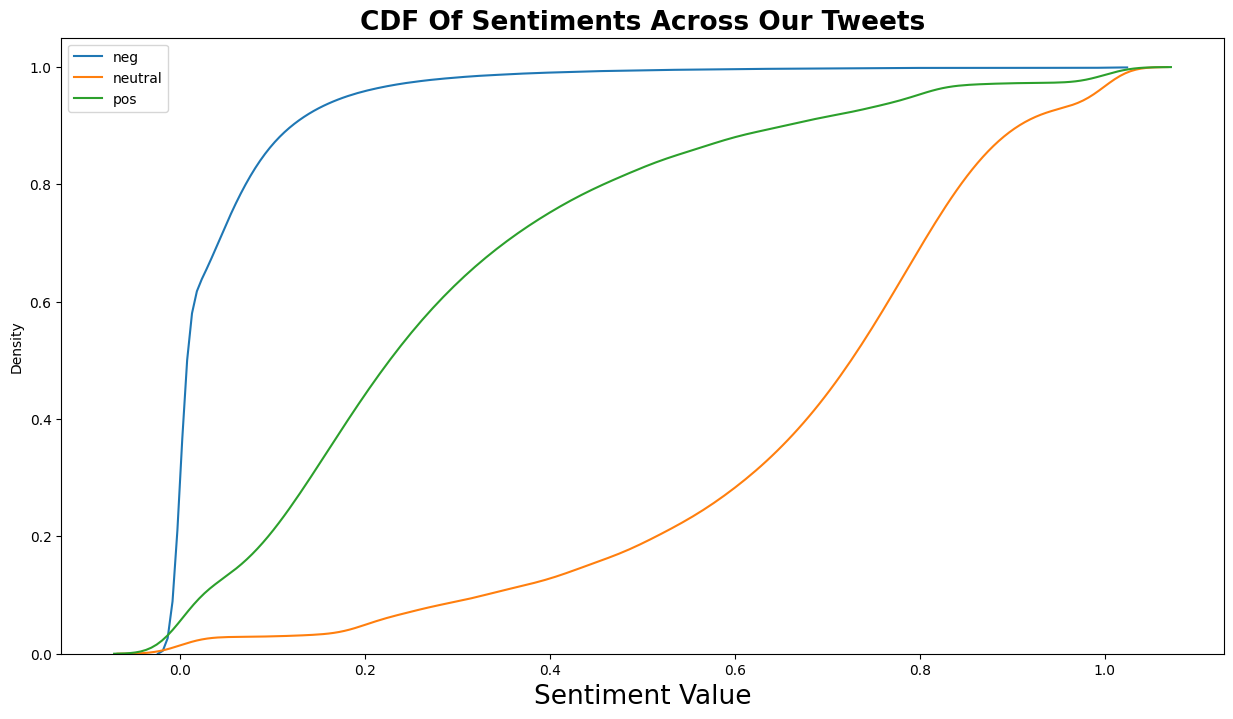

In [33]:

plt.figure(figsize = (15, 8))
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(M_data['neg'],bw=0.1,cumulative=True)
sns.kdeplot(M_data['neu'],bw=0.1,cumulative=True)
sns.kdeplot(M_data['pos'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend(['neg', 'neutral', 'pos'])
plt.show()

# Intepretation of the graph
- It is also clear that the dominant sentiment is neutral; oddly, most of the reviews do not resemble more positive or negative sentiment rather than neutral.

In [34]:
M_data.dropna(inplace = True)

Creating a class column based on compound score

In [35]:
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'pos'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'neg'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neutral'

In [36]:
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

Converting the final sentiment score dataframe to a csv file 

In [37]:
M_data.to_csv("M_datafinal.csv")

In [38]:
M_data.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,pos,0470536454,crocheting for dummies by karen manthey susan ...,Bendy,5.0,1.092010e+09,2004-08-09,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.008,0.820,0.172,0.9945,2004,8
1,pos,0470536454,very helpful,Amazon Customer,4.0,1.491437e+09,2017-04-06,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.000,0.244,0.756,0.4754,2017,4
2,pos,0470536454,easy to understand and a prompt service too,Amazon Customer,5.0,1.489450e+09,2017-03-14,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.000,0.674,0.326,0.4404,2017,3
3,neutral,0470536454,my girlfriend use quite often,Christopher Burnett,4.0,1.487030e+09,2017-02-14,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000,2017,2
4,pos,0470536454,arrived as described very happy,Amazon Customer,5.0,1.485648e+09,2017-01-29,wiley publishers crocheting for dummies revised,"[Musical Instruments, Instrument Accessories, ...",,Wiley Publishing,Pos,0.000,0.500,0.500,0.6115,2017,1


# Text Classification

- Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

In [39]:
df = pd.read_csv('M_datafinal.csv')
df.head()

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0470536454,crocheting for dummies by karen manthey susan ...,Bendy,5.0,1.092010e+09,2004-08-09,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.008,0.820,0.172,0.9945,2004,8
1,1,pos,0470536454,very helpful,Amazon Customer,4.0,1.491437e+09,2017-04-06,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.244,0.756,0.4754,2017,4
2,2,pos,0470536454,easy to understand and a prompt service too,Amazon Customer,5.0,1.489450e+09,2017-03-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.674,0.326,0.4404,2017,3
3,3,neutral,0470536454,my girlfriend use quite often,Christopher Burnett,4.0,1.487030e+09,2017-02-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000,2017,2
4,4,pos,0470536454,arrived as described very happy,Amazon Customer,5.0,1.485648e+09,2017-01-29,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.500,0.500,0.6115,2017,1


In [40]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [41]:
df.isnull().sum()

Unnamed: 0             0
Class                  0
asin                   0
reviewText           378
reviewerName          49
overall                0
unixReviewTime         0
reviewTime             0
title                  0
category               0
price             252205
brand               9969
Sentiment              0
neg                    0
neu                    0
pos                    0
compound               0
year                   0
month                  0
dtype: int64

In [42]:
df.dropna(inplace = True)

Dropping the unnamed column

In [43]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [44]:
# slicing the data
df1 = df.iloc[:100, :]
df1.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
241,pos,0615582222,for the last few years i have been studying ja...,William Stubblefield,5.0,1.379117e+09,2013-09-14,being here,[],$22.98,Radhio.org,Pos,0.014,0.810,0.176,0.9868,2013,9
242,pos,0615582222,what an amazing book i m so impressed with rad...,Tim ORTLIEB,5.0,1.377821e+09,2013-08-30,being here,[],$22.98,Radhio.org,Pos,0.000,0.790,0.210,0.9882,2013,8
243,pos,0615582222,whether a lover of jazz or not radhika philip ...,David Hole,5.0,1.377648e+09,2013-08-28,being here,[],$22.98,Radhio.org,Pos,0.000,0.792,0.208,0.9756,2013,8
244,pos,0615582222,great read very inspiring for a musician,PR,4.0,1.439856e+09,2015-08-18,being here,[],$22.98,Radhio.org,Pos,0.000,0.357,0.643,0.8016,2015,8
245,pos,0615582222,this book gives you an inside glimpse into the...,Charles Pratt III,5.0,1.398038e+09,2014-04-21,being here,[],$22.98,Radhio.org,Pos,0.000,0.735,0.265,0.8807,2014,4


### Removing Stop Words

Stop words are commonly used words in a language that are generally considered to be of little value in determining the meaning or sentiment of a text. Examples of stop words in English include "the", "a", "an", "in", "on", "is", "and", "of", "at", "to", and so on.

In natural language processing, stop words are often removed from texts before further processing such as sentiment analysis, topic modeling, or text classification. This is because stop words can introduce noise into the analysis and may not add any meaningful information to the text. Removing stop words can also help reduce the computational complexity of processing large volumes of text.


In [45]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Applying the stop word function on the reviewText Column

In [46]:
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Making WordCloud

In [47]:
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['reviewText']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [48]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'title', 'category', 'price', 'brand',
       'Sentiment', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [49]:
neg=df[df["Class"] == "Neg"]["reviewText"]
pos=df[df["Class"] == "Pos"]["reviewText"]
neu=df[df["Class"] == "Neutral"]["reviewText"]

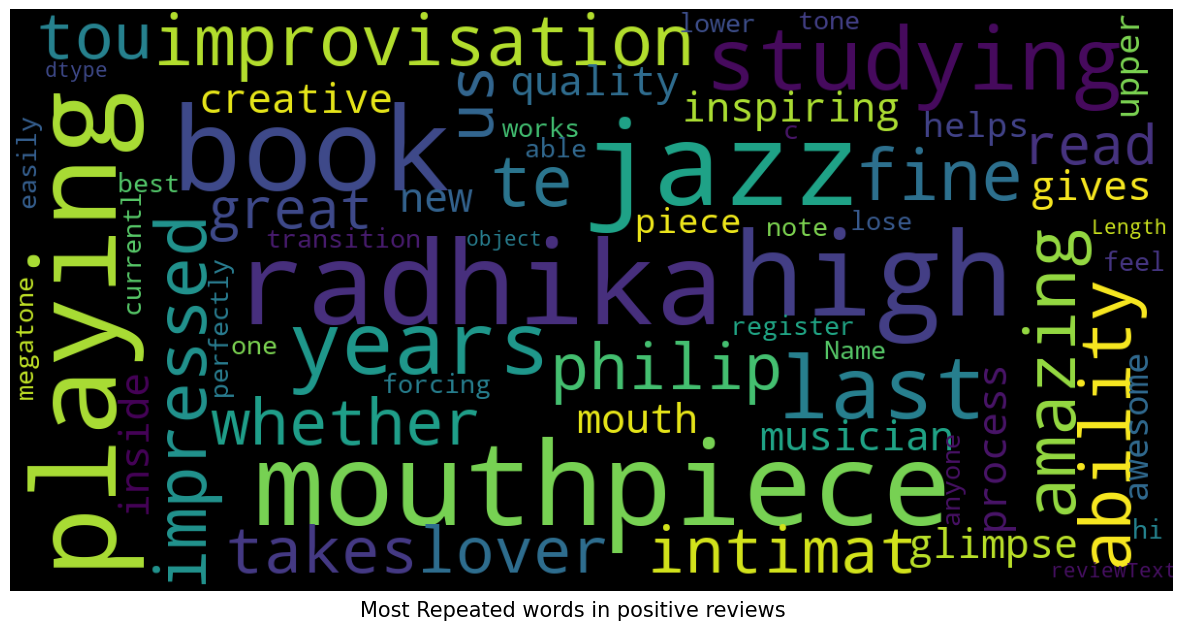

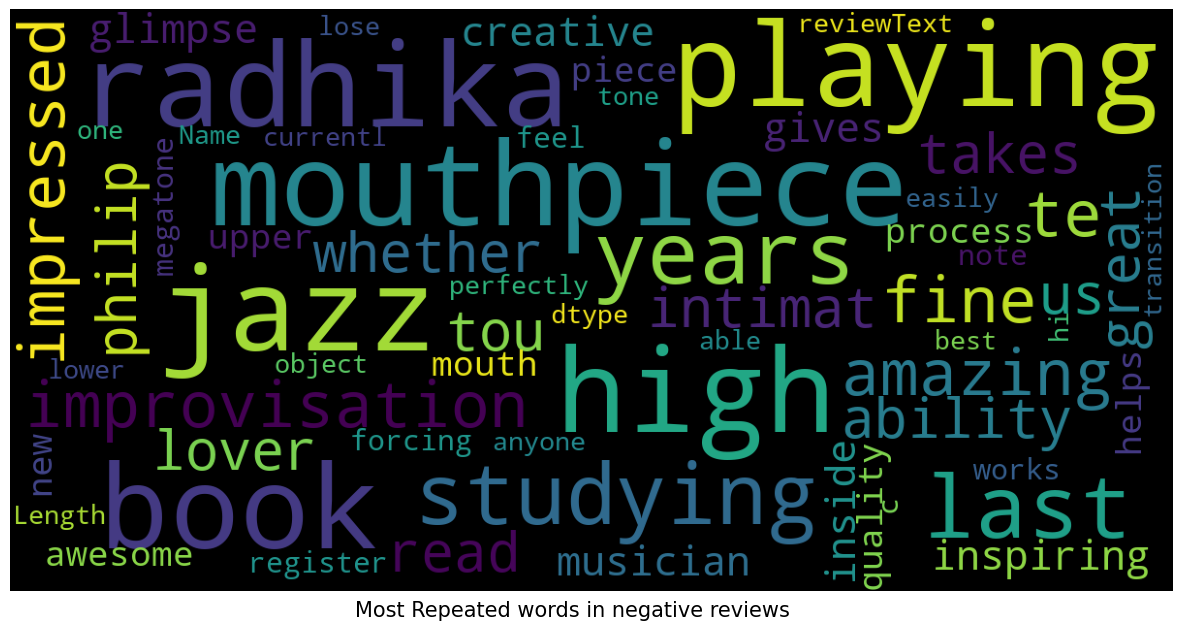

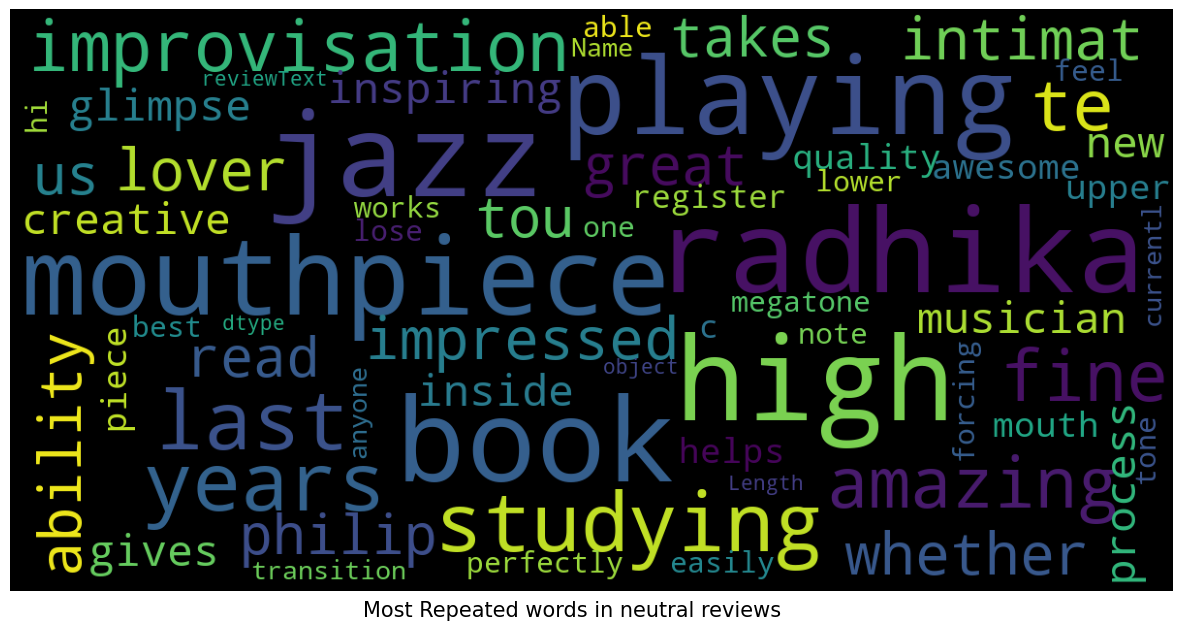

In [50]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

#### From about WordCLoud We can see the most used positive,negative and neutral words from the reviewText

## Building the model for Sentiment Prediction

In [51]:
df=pd.read_csv('M_datafinal.csv')

In [52]:
df.head(10)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0470536454,crocheting for dummies by karen manthey susan ...,Bendy,5.0,1.092010e+09,2004-08-09,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.008,0.820,0.172,0.9945,2004,8
1,1,pos,0470536454,very helpful,Amazon Customer,4.0,1.491437e+09,2017-04-06,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.244,0.756,0.4754,2017,4
2,2,pos,0470536454,easy to understand and a prompt service too,Amazon Customer,5.0,1.489450e+09,2017-03-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.674,0.326,0.4404,2017,3
3,3,neutral,0470536454,my girlfriend use quite often,Christopher Burnett,4.0,1.487030e+09,2017-02-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000,2017,2
4,4,pos,0470536454,arrived as described very happy,Amazon Customer,5.0,1.485648e+09,2017-01-29,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.500,0.500,0.6115,2017,1
5,5,pos,0470536454,love the dummies series never fails,Iheartmanatees,5.0,1.483488e+09,2017-01-04,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.380,0.620,0.7602,2017,1
6,6,pos,0470536454,good book,D. Eva,5.0,1.483315e+09,2017-01-02,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.256,0.744,0.4404,2017,1
7,7,pos,0470536454,just started reading it love the charts cautions,Stoeffels,4.0,1.482278e+09,2016-12-21,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.625,0.375,0.6369,2016,12
8,8,pos,0470536454,great book,nan ekelund,4.0,1.482192e+09,2016-12-20,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.196,0.804,0.6249,2016,12
9,9,pos,0470536454,this is a very helpful book,Jacqueline Bryant,5.0,1.481760e+09,2016-12-15,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.564,0.436,0.4754,2016,12


### Building model for prediction


In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

In [54]:
X = df['reviewText']
Y = df['Sentiment']

In [55]:
X, Y = df.reviewText.fillna(' '), df.Sentiment

In [56]:
X.value_counts()

great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [57]:
Y.value_counts()

Pos        998024
Neg        145076
Neutral     84893
Name: Sentiment, dtype: int64

In [58]:
Y = LabelEncoder().fit_transform(Y)
Y

array([2, 2, 2, ..., 2, 2, 1])

In [59]:
unique, counts = np.unique(Y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 145076]
 [     1  84893]
 [     2 998024]]


Spitting the Training and Testing Data

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Applying TFIDF Vectorizer to convert Reviewtext to vector for model prediction

In [61]:
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.1, min_df = 1,
                             use_idf = True, smooth_idf = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### Applying different model to get best models for classification

Considering different classification algorithms for prediction

#### Using Naive Bayes Classification

Making the model and fitting the data

In [62]:
model1 = MultinomialNB().fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

Printing classification matrix

In [63]:
print(classification_report(Y_test, y_pred1, target_names = ['neg', 'nue', 'pos']))

              precision    recall  f1-score   support

         neg       0.91      0.19      0.31     43331
         nue       0.35      0.00      0.00     25188
         pos       0.83      1.00      0.91    299879

    accuracy                           0.84    368398
   macro avg       0.70      0.40      0.41    368398
weighted avg       0.81      0.84      0.78    368398



#### Using Logistic Regression Model

Making the model and fitting the data

In [64]:
model = LogisticRegression(multi_class = 'ovr').fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [65]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0  37947]
 [     1   4951]
 [     2 325500]]


Printing the confustion matrix for Logistic Regression

In [66]:
%%time
print(classification_report(Y_test, y_pred, target_names = ['neg', 'neu', 'pos']))

              precision    recall  f1-score   support

         neg       0.74      0.65      0.69     43331
         neu       0.44      0.09      0.15     25188
         pos       0.90      0.98      0.94    299879

    accuracy                           0.88    368398
   macro avg       0.70      0.57      0.59    368398
weighted avg       0.85      0.88      0.86    368398

CPU times: total: 375 ms
Wall time: 393 ms


### Testing classification by putting sample reviews in the model

In [67]:
a = ['Nice product good to buy', 'worst product waste of money', 'Good product but not useful for this']
a1 = vectorizer.transform(a)

In [68]:
fo = model.predict(a1)
fo

array([2, 0, 2])

In [69]:
s = pd.DataFrame({"Random_review":a, "Predictions": ['Positive', 'Negative', 'Positive']})
s

,Random_review,Predictions
0,Nice product good to buy,Positive
1,worst product waste of money,Negative
2,Good product but not useful for this,Positive


As you can see that the Logistic Regression Model is working fine and classifying correctly

#### Using ADABoost Classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier  

Making the model and fitting the data

In [71]:
model2 = AdaBoostClassifier().fit(X_train, Y_train)
Y_pred3 = model2.predict(X_test)

Printing the classification Matrix for AdaBoost Classifier

In [72]:
print(classification_report(Y_test, Y_pred3, target_names = ['neg', 'nue', 'pos']))

              precision    recall  f1-score   support

         neg       0.69      0.38      0.49     43331
         nue       0.40      0.04      0.07     25188
         pos       0.86      0.98      0.92    299879

    accuracy                           0.85    368398
   macro avg       0.65      0.47      0.49    368398
weighted avg       0.81      0.85      0.81    368398



## Time Series Analysis of Sentiments

In [73]:
df1 = df[['neg', 'pos','neu', 'reviewTime']]

In [74]:
df1.head()

,neg,pos,neu,reviewTime
0,0.008,0.172,0.820,2004-08-09
1,0.000,0.756,0.244,2017-04-06
2,0.000,0.326,0.674,2017-03-14
3,0.000,0.000,1.000,2017-02-14
4,0.000,0.500,0.500,2017-01-29


In [75]:
df1['reviewTime'] = pd.to_datetime(df1['reviewTime'])

In [76]:
df1.head()

,neg,pos,neu,reviewTime
0,0.008,0.172,0.820,2004-08-09
1,0.000,0.756,0.244,2017-04-06
2,0.000,0.326,0.674,2017-03-14
3,0.000,0.000,1.000,2017-02-14
4,0.000,0.500,0.500,2017-01-29


In [77]:
df1 = df1.set_index('reviewTime')
df1.head()

,neg,pos,neu
reviewTime,,,
2004-08-09,0.008,0.172,0.820
2017-04-06,0.000,0.756,0.244
2017-03-14,0.000,0.326,0.674
2017-02-14,0.000,0.000,1.000
2017-01-29,0.000,0.500,0.500


Resampling the data based on weekly dates to fit into the Seasonal Decompose Graph

In [78]:
df1 = df1.resample('W').sum()
df1.shape

(979, 3)

#### Seasonal Decompose for Positive Sentiments

Text(0.5, 1.0, 'Pos_residual')

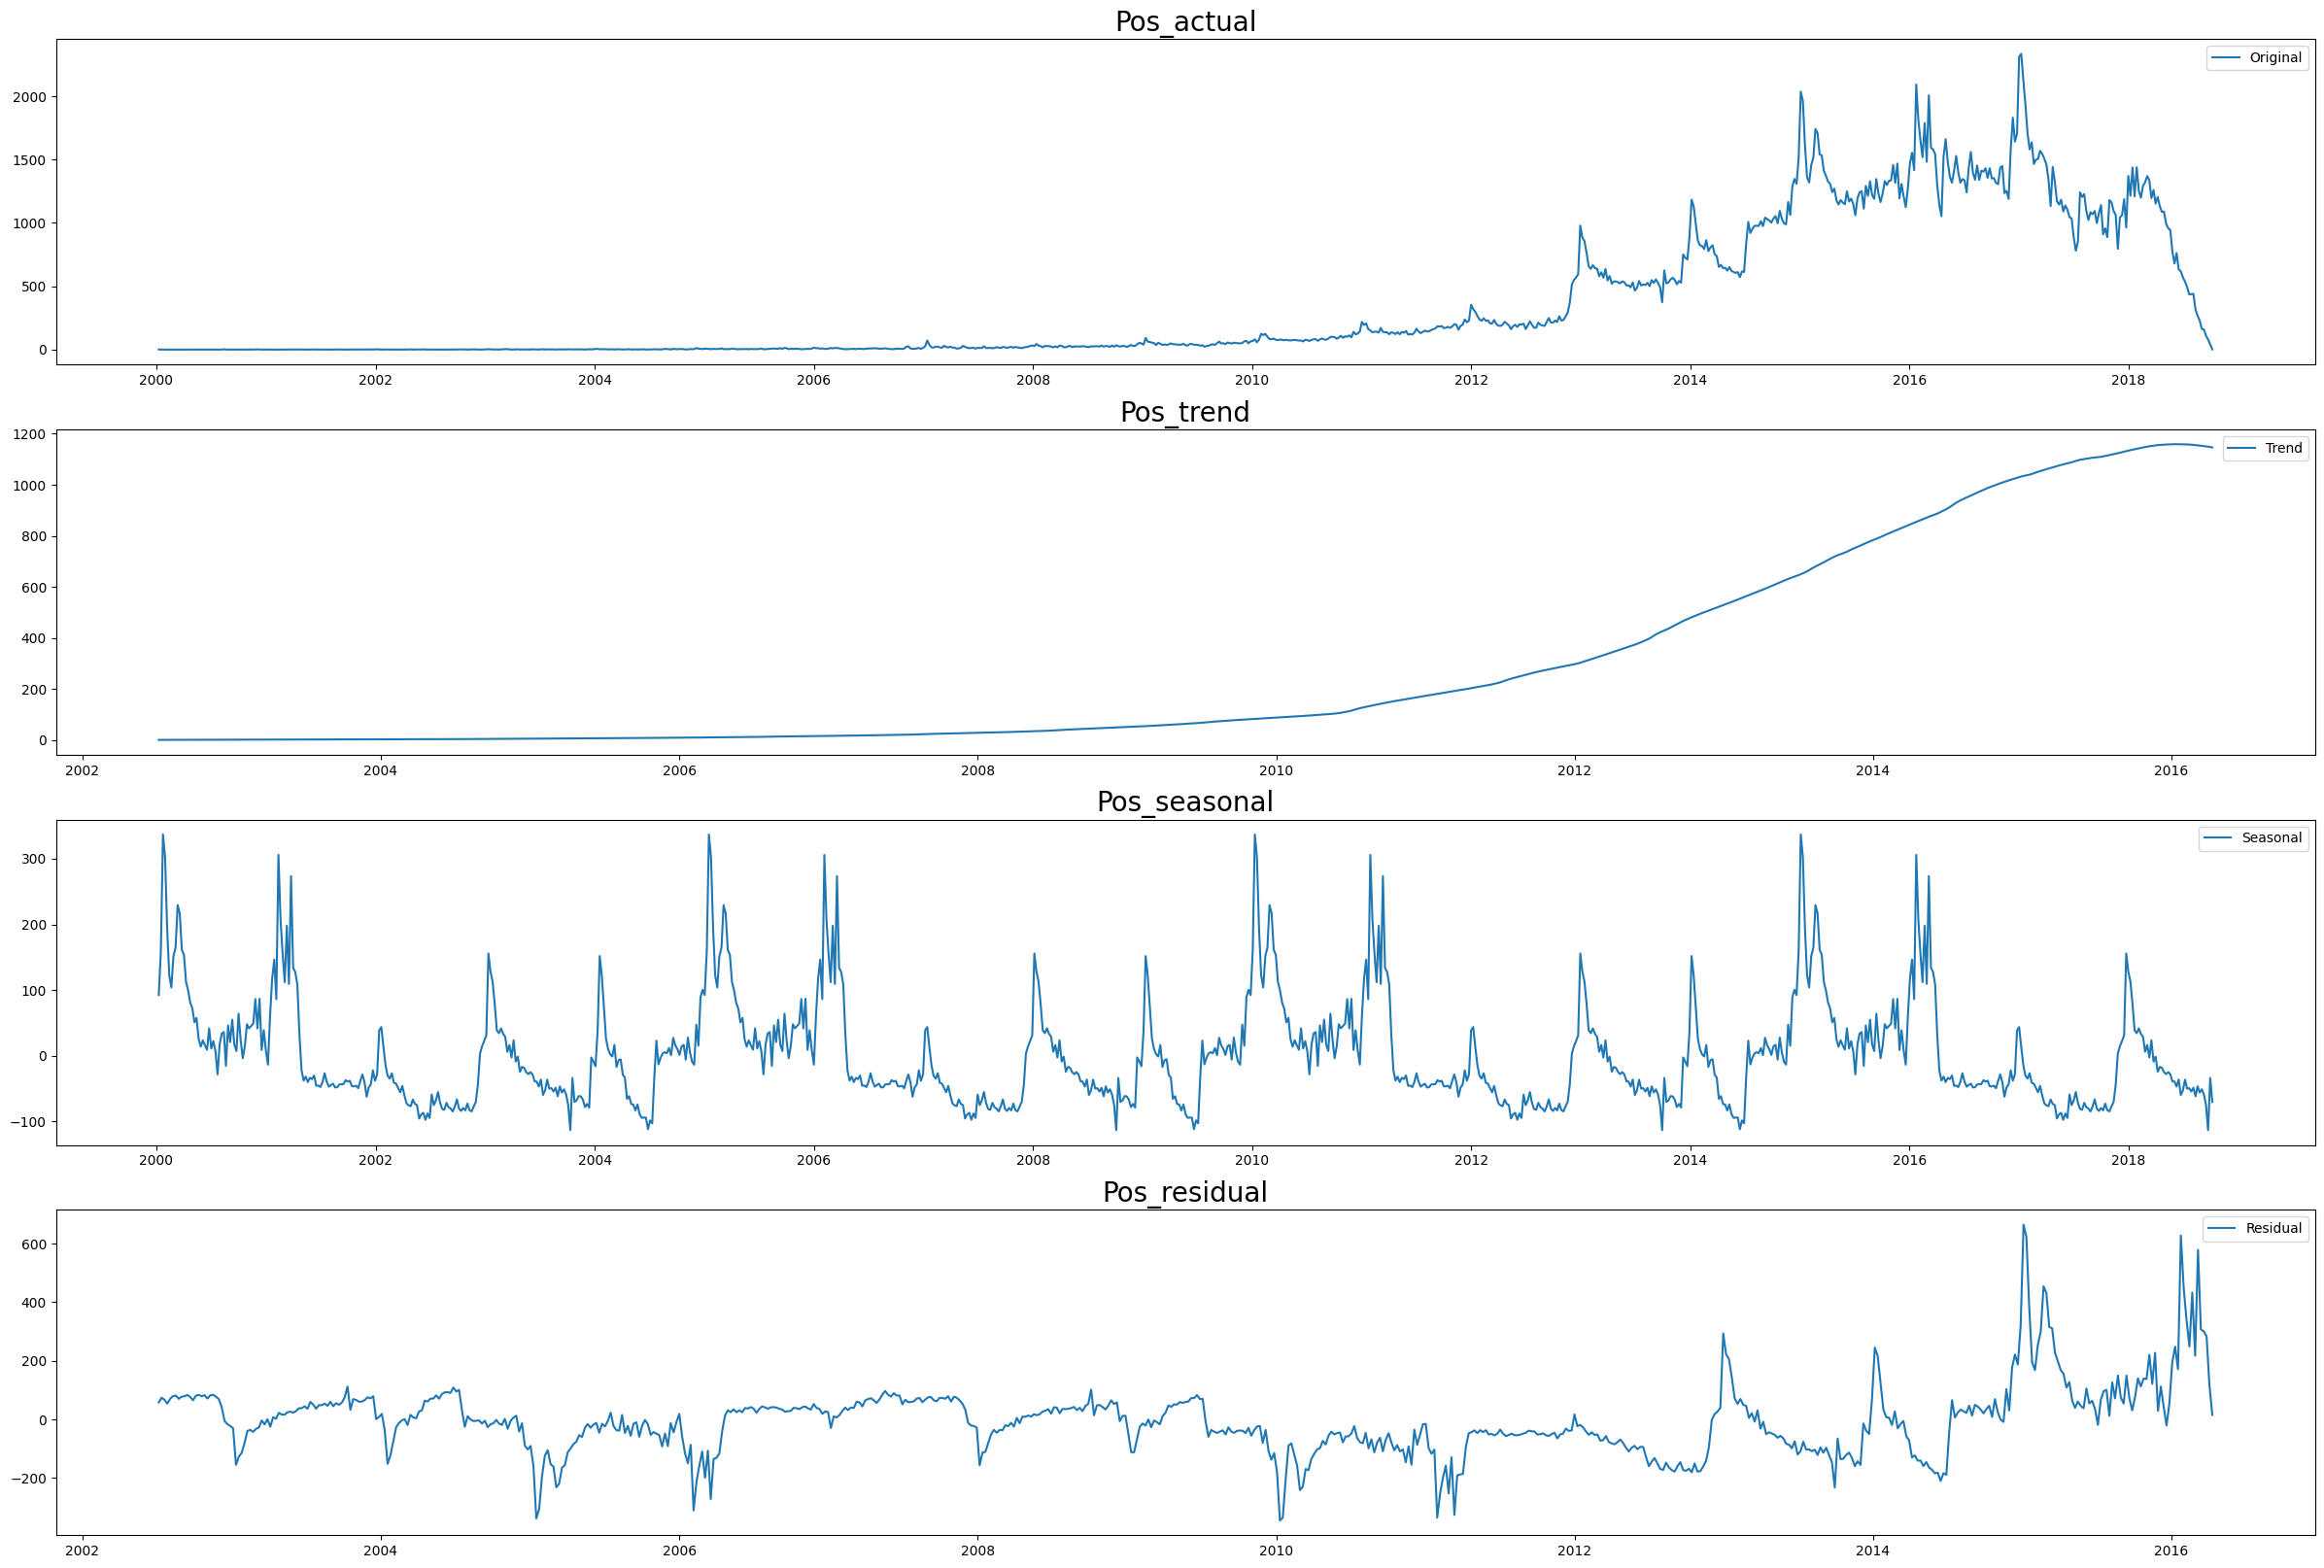

In [79]:


decomposition=seasonal_decompose(df1['pos'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['pos'],label='Original')
plt.legend(loc='best')
plt.title('Pos_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('Pos_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('Pos_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('Pos_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for positive reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

#### Seasonal Decompose for Negative Sentiment  

Text(0.5, 1.0, 'neg_residual')

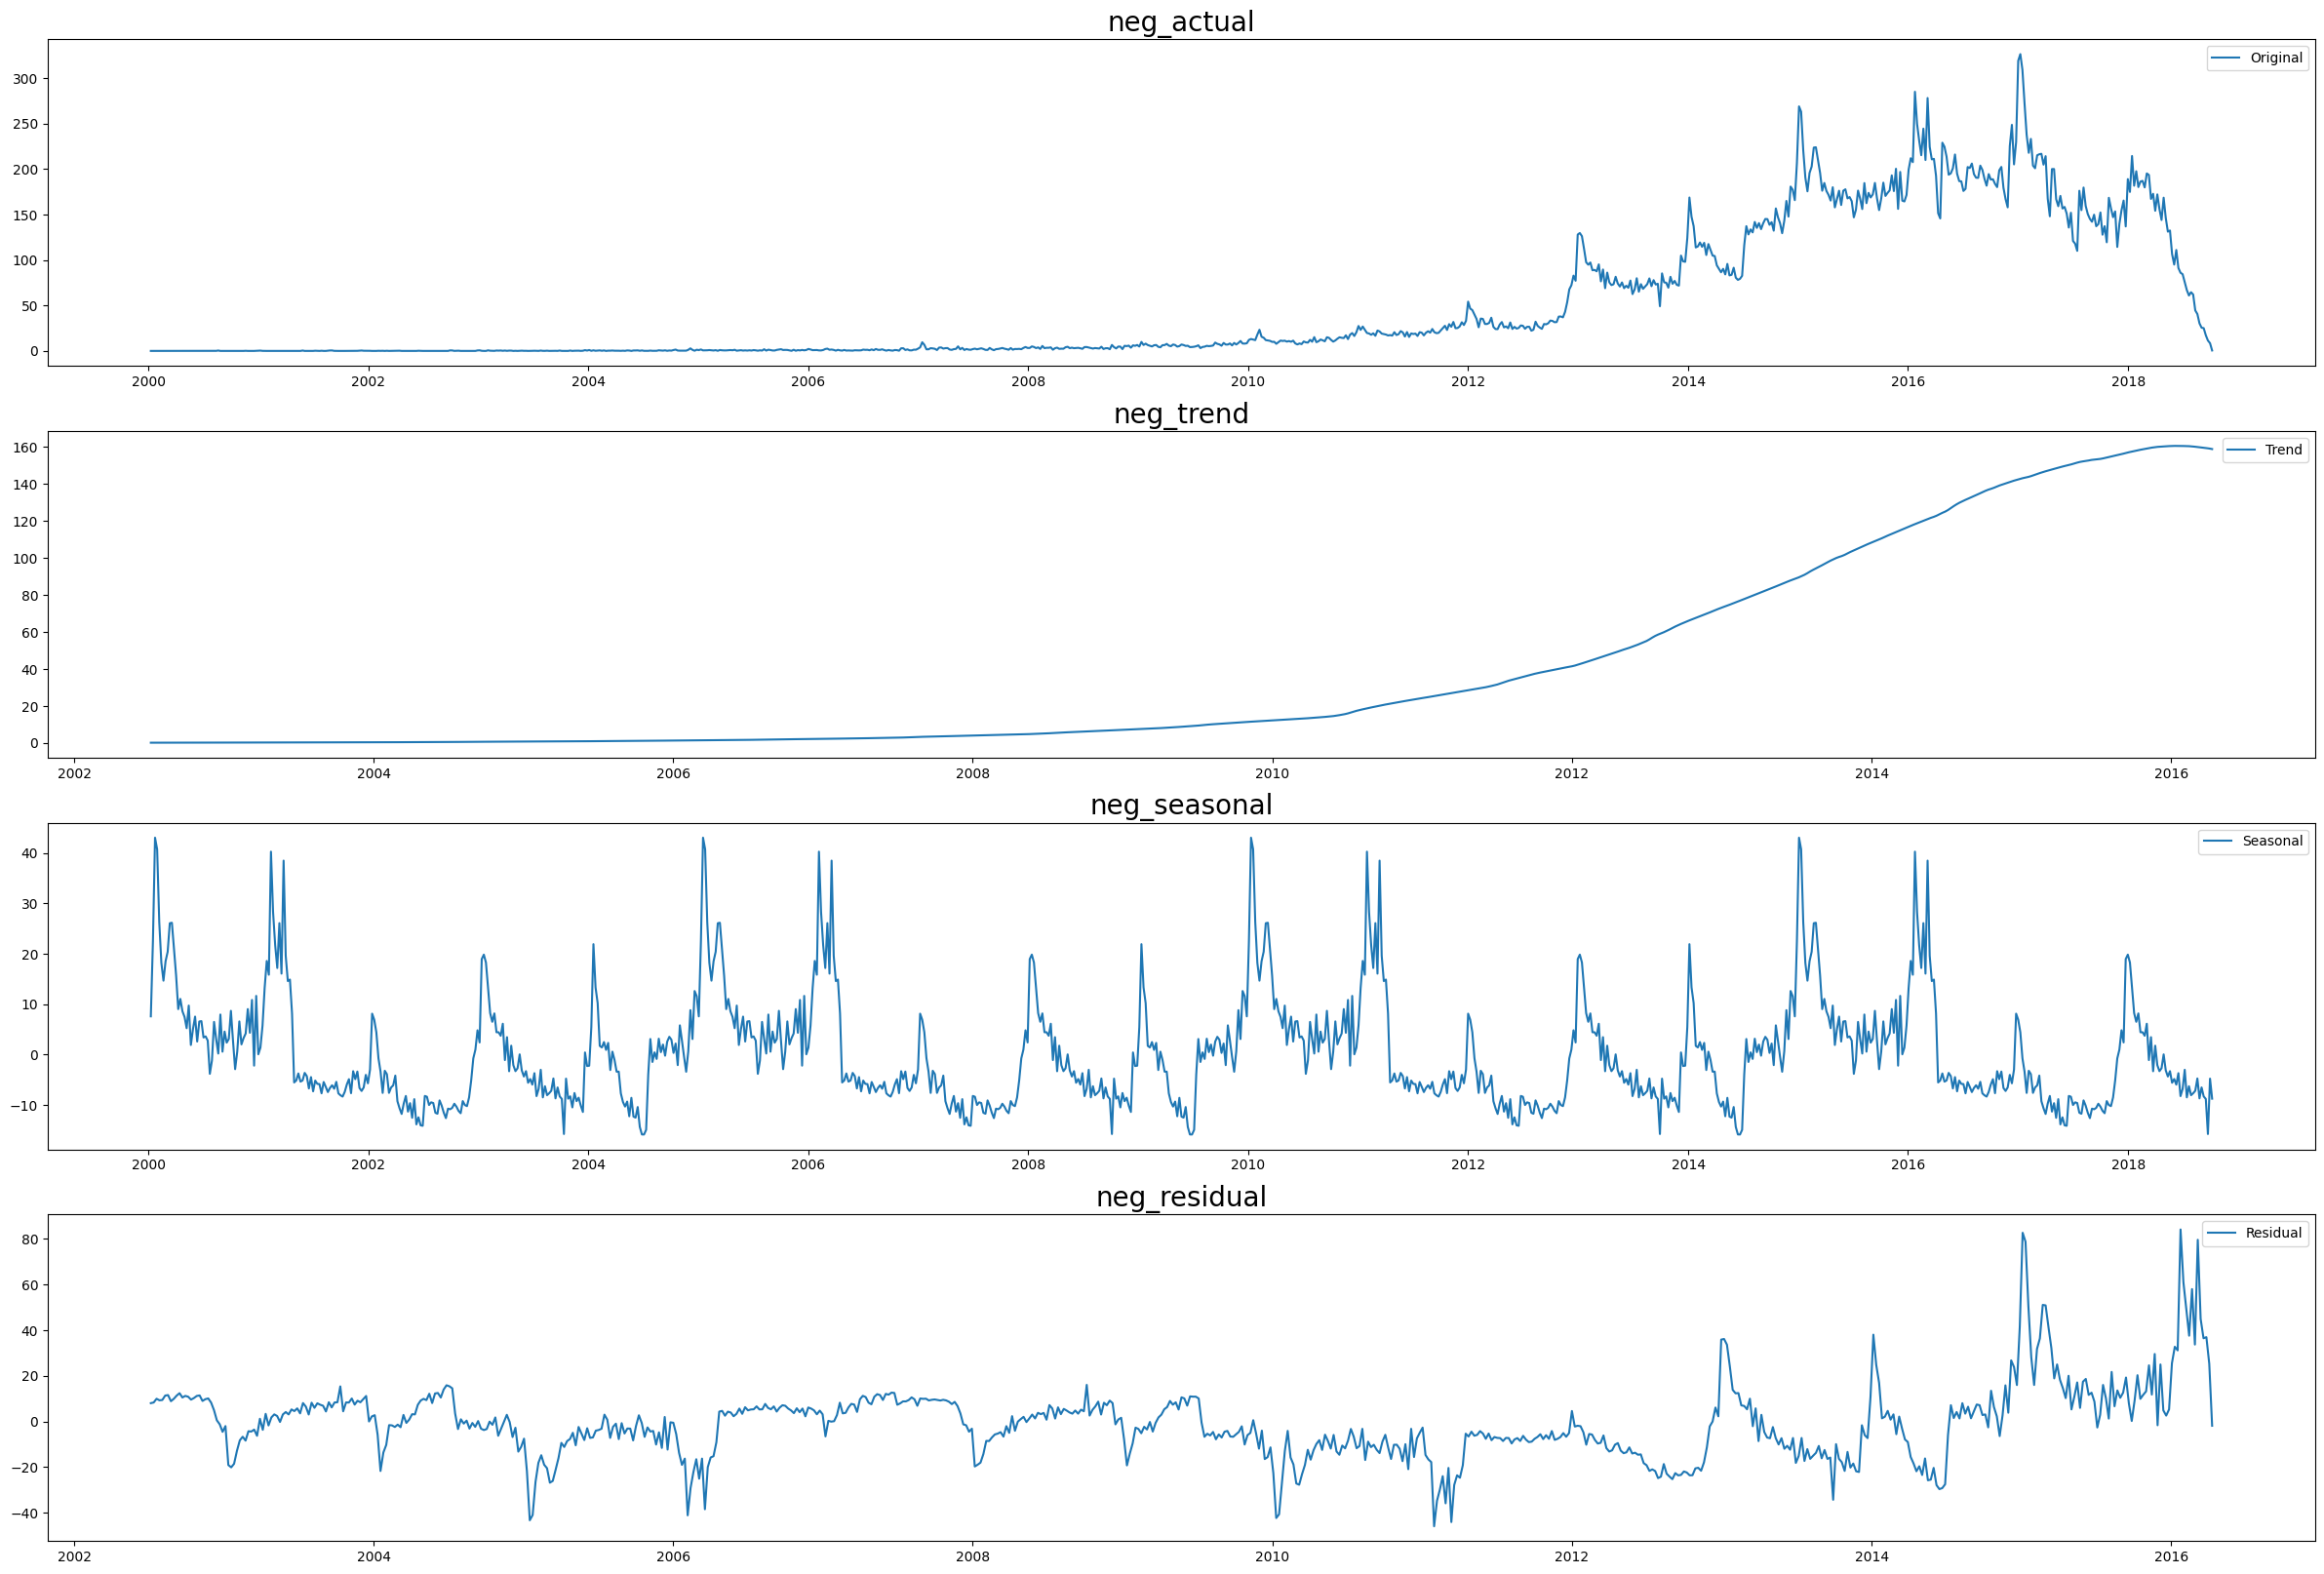

In [80]:
# Seasonal Decompose For Negative Reviews
decomposition=seasonal_decompose(df1['neg'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['neg'],label='Original')
plt.legend(loc='best')
plt.title('neg_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('neg_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('neg_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('neg_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for negative reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

#### Seasonal Decompose for Neutral Reviews

Text(0.5, 1.0, 'neu_residual')

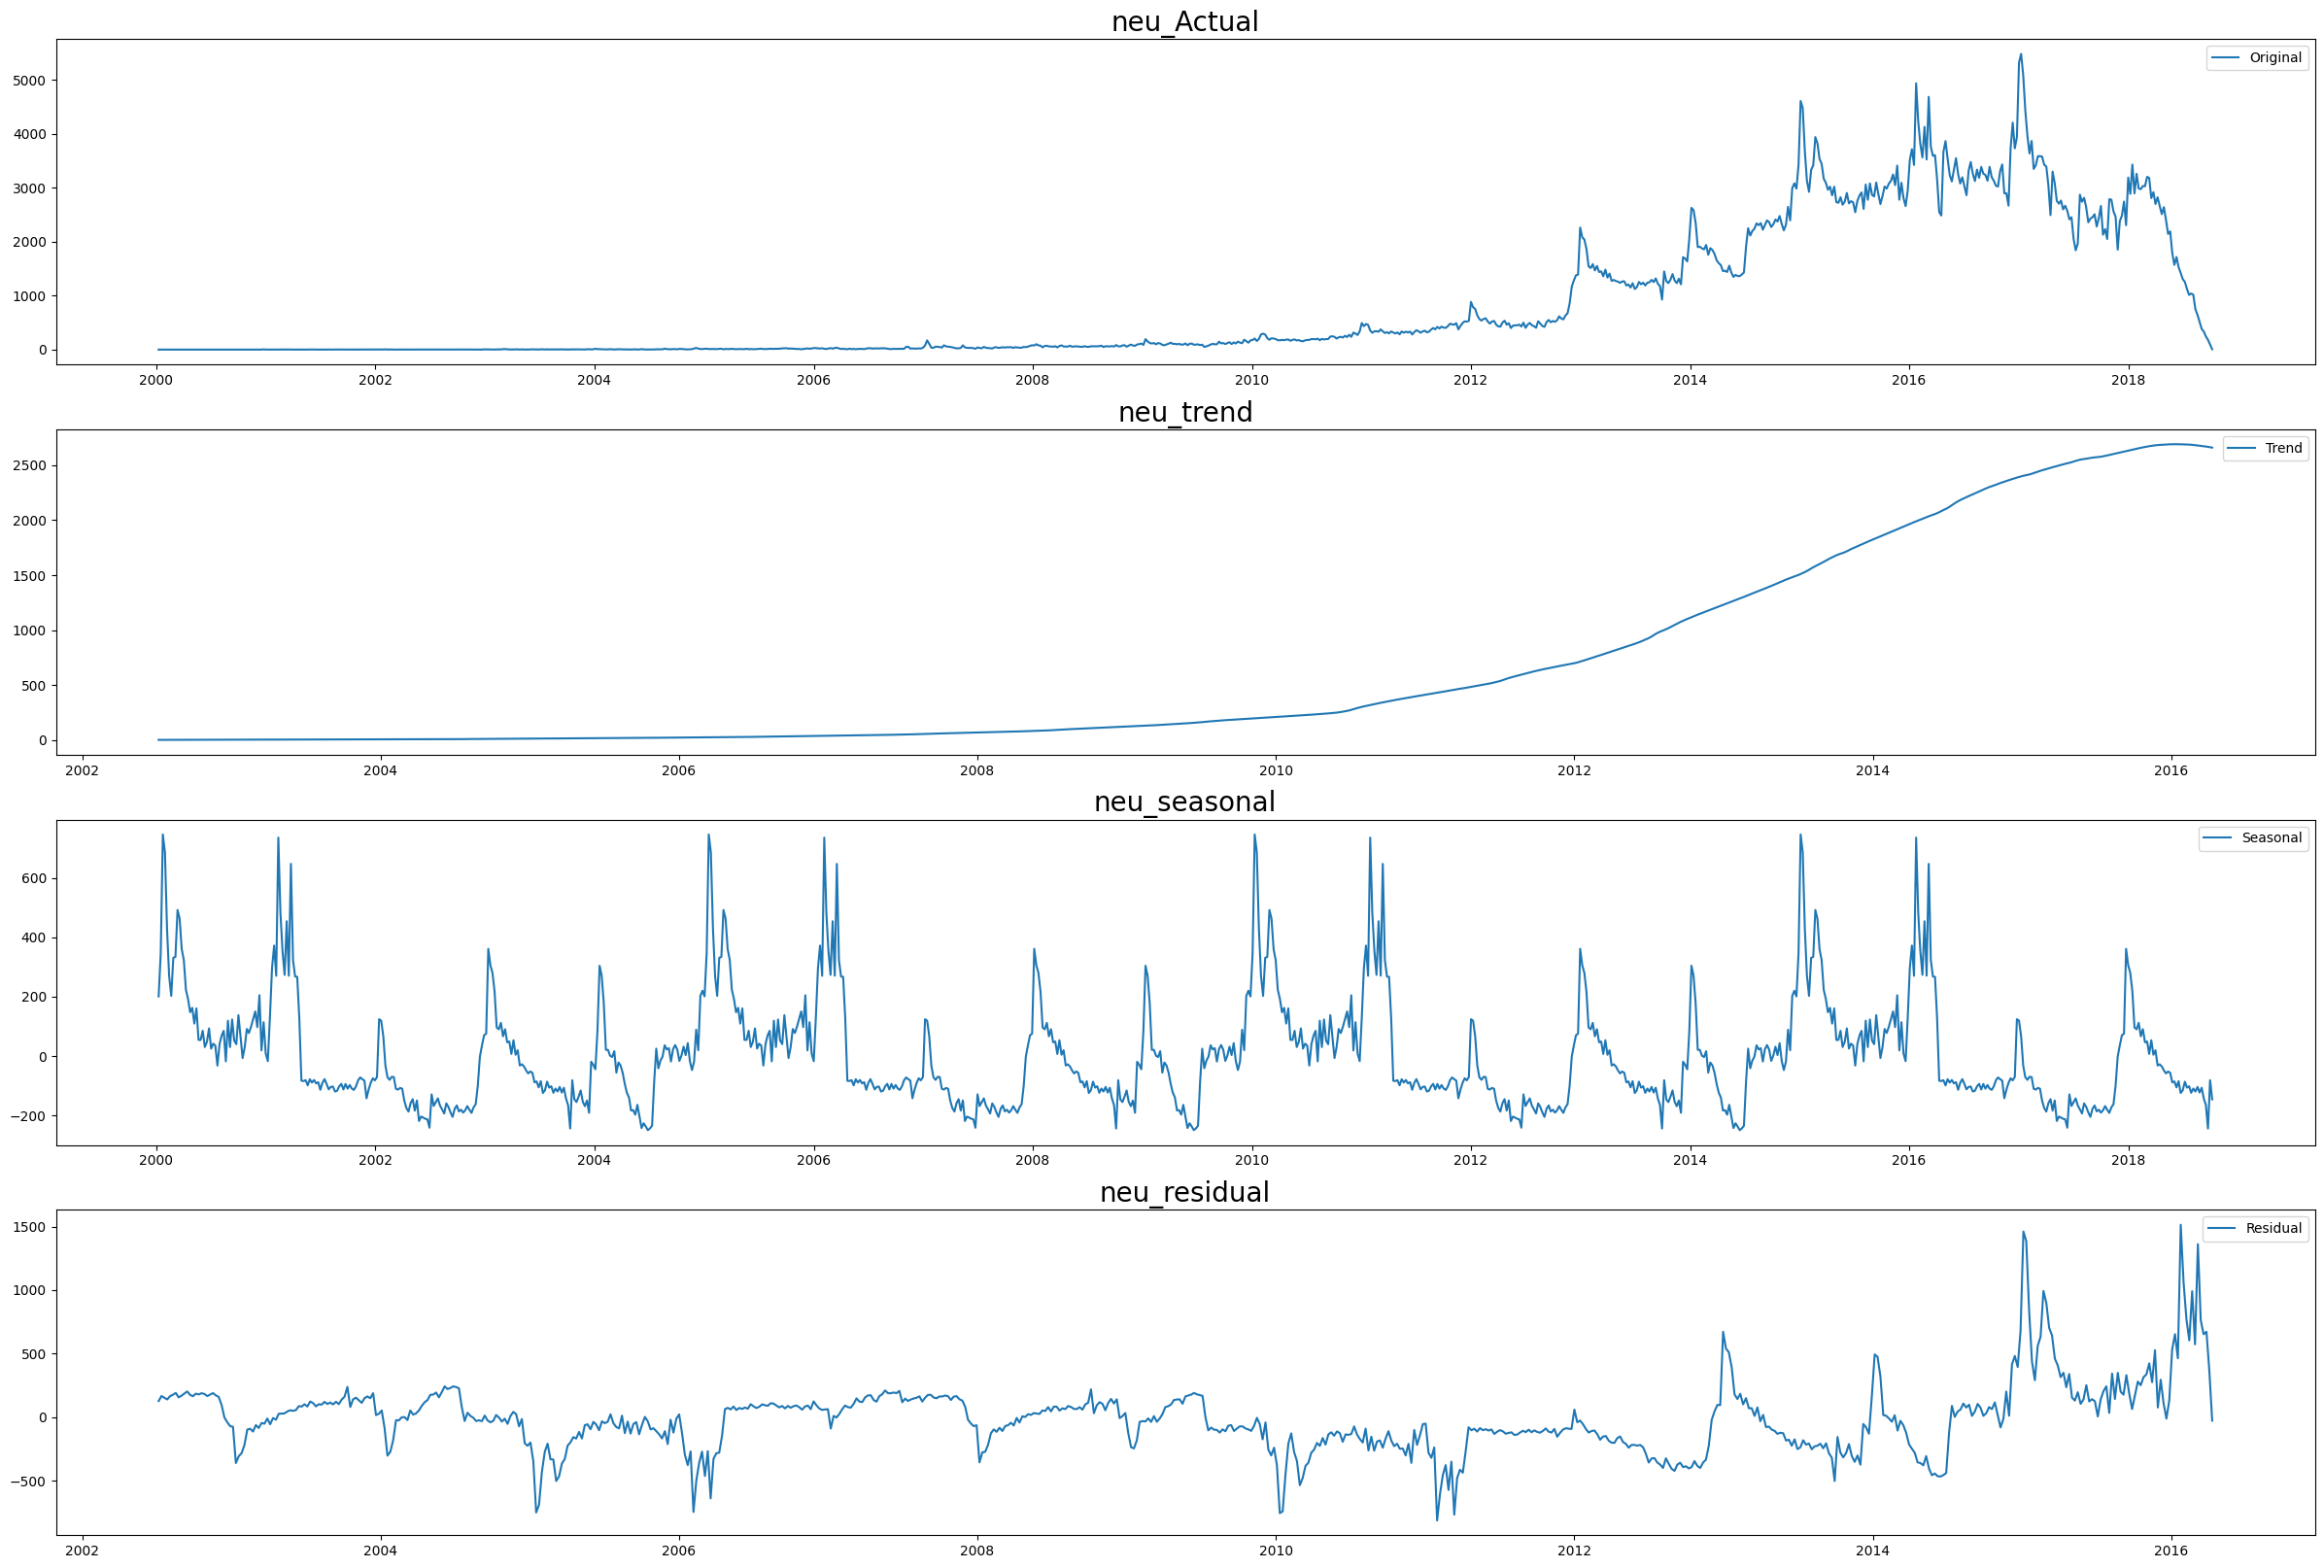

In [81]:
# Seasonal Decompose For Negative Reviews
decomposition=seasonal_decompose(df1['neu'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['neu'],label='Original')
plt.legend(loc='best')
plt.title('neu_Actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('neu_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('neu_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('neu_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for neutral reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

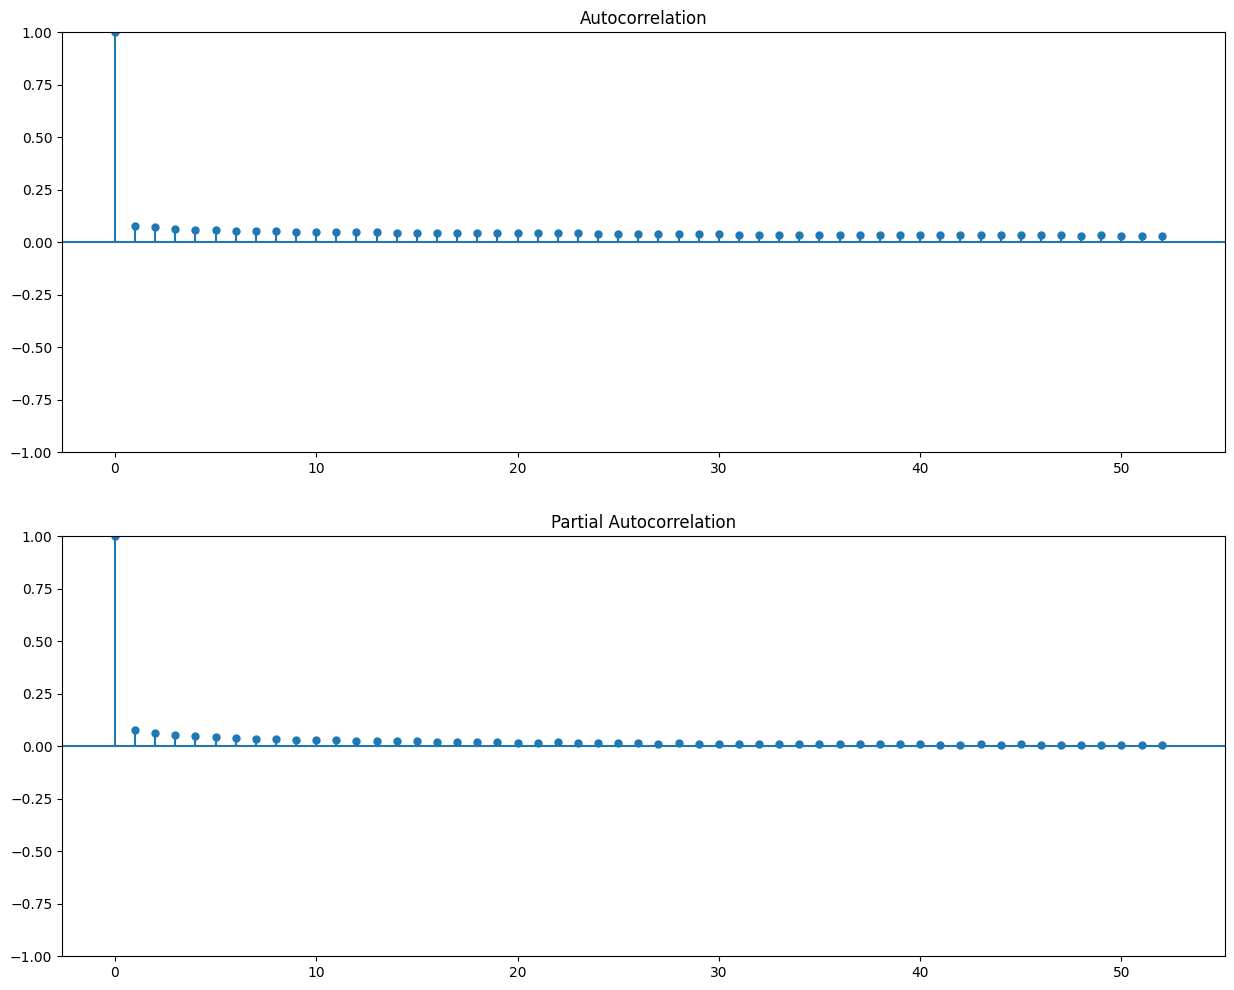

In [82]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['pos'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['pos'], ax=plt.gca(), lags = 52)
plt.show()

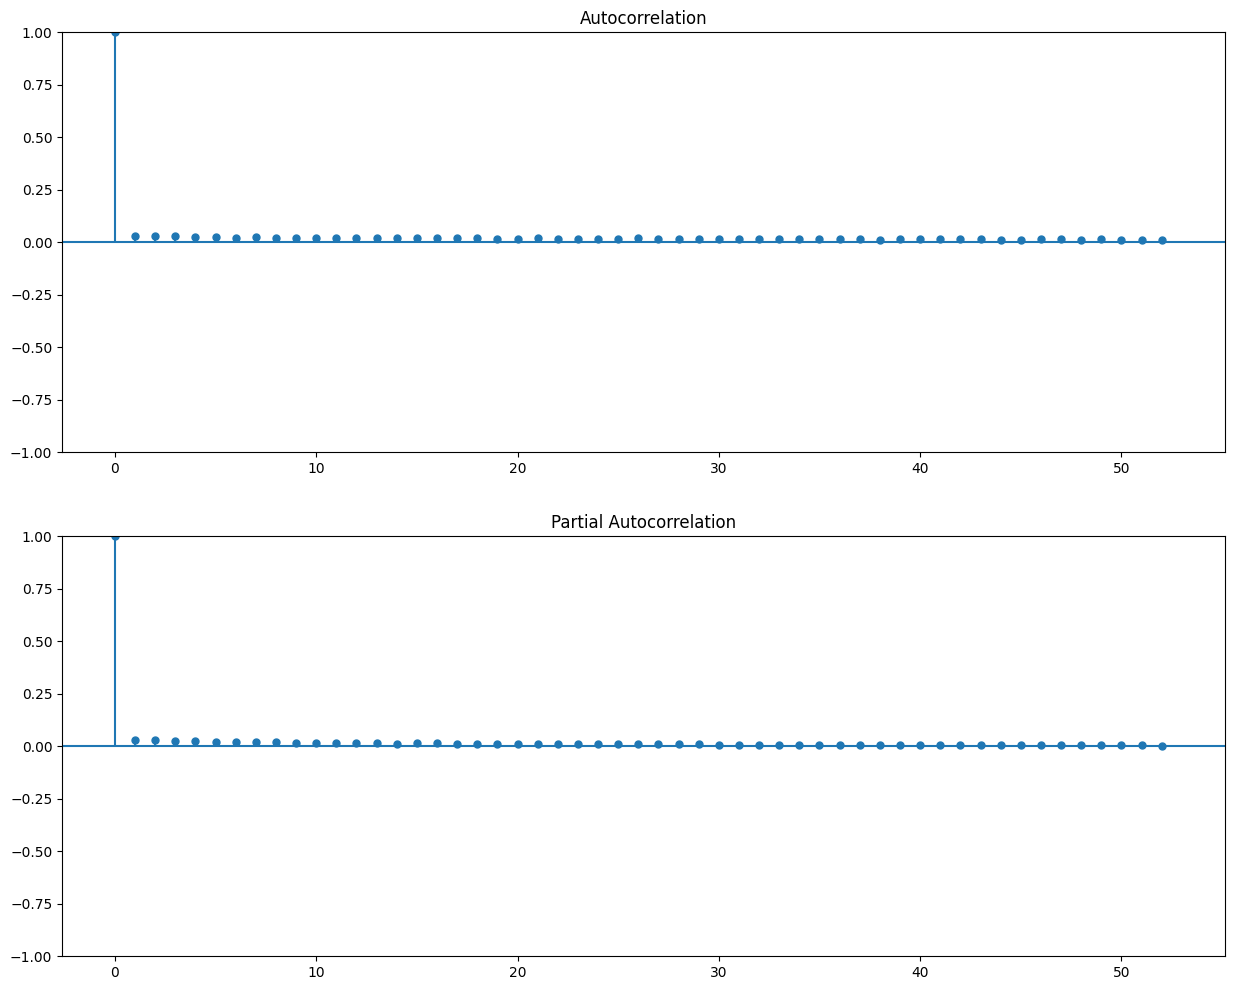

In [83]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['neg'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['neg'], ax=plt.gca(), lags = 52)
plt.show()

### Checking Stationarity of the Dataset

In [84]:
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [85]:
checkstationary(df1['neg'])

'Pvalue:0.5657465401055206.Data is not stationary, make data stationary'

**- From augmented dickey fuller test we can see that the data is not stationary so we should do diffrencing or d = 1 while building the model for prediction**</div>

In [86]:
checkstationary(df1['pos'])

'Pvalue:0.5568440663406161.Data is not stationary, make data stationary'

**- From augmented dickey fuller test we can see that the data is not stationary so we should do diffrencing or d = 1 while building the model for prediction**

## Predicting Sentiments 

Splitting the Data for fitting into Sarimax Model

In [87]:
split = int(0.95 * len(df1))
train = df1.iloc[:split]
test = df1.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 930, Test = 49


Creating a Sarimax function to get optimum p and q values

In [88]:
def sarima_model(p,d,q,P,D,Q):
    sm1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,52)).fit()
    f1=sm1.forecast(len(test))
    actual=[]
    predicted=[]
    for i in range(len(f1)):
        actual.append(test[i])
        predicted.append(f1[i])
    RMSE=round(mean_squared_error(actual,predicted,squared=False),3)
    return RMSE,actual,predicted

In [89]:
def SARMA1(df):
    model2 = SARIMAX(train['neg'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [90]:
def SARMA2(df):
    model2 = SARIMAX(train['pos'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [91]:
train1 = SARMA1(train['neg'])

Summary : S
past_predictions : past
future_predictions : future


In [92]:
train2 = SARMA2(train['pos'])

Summary : S
past_predictions : past
future_predictions : future


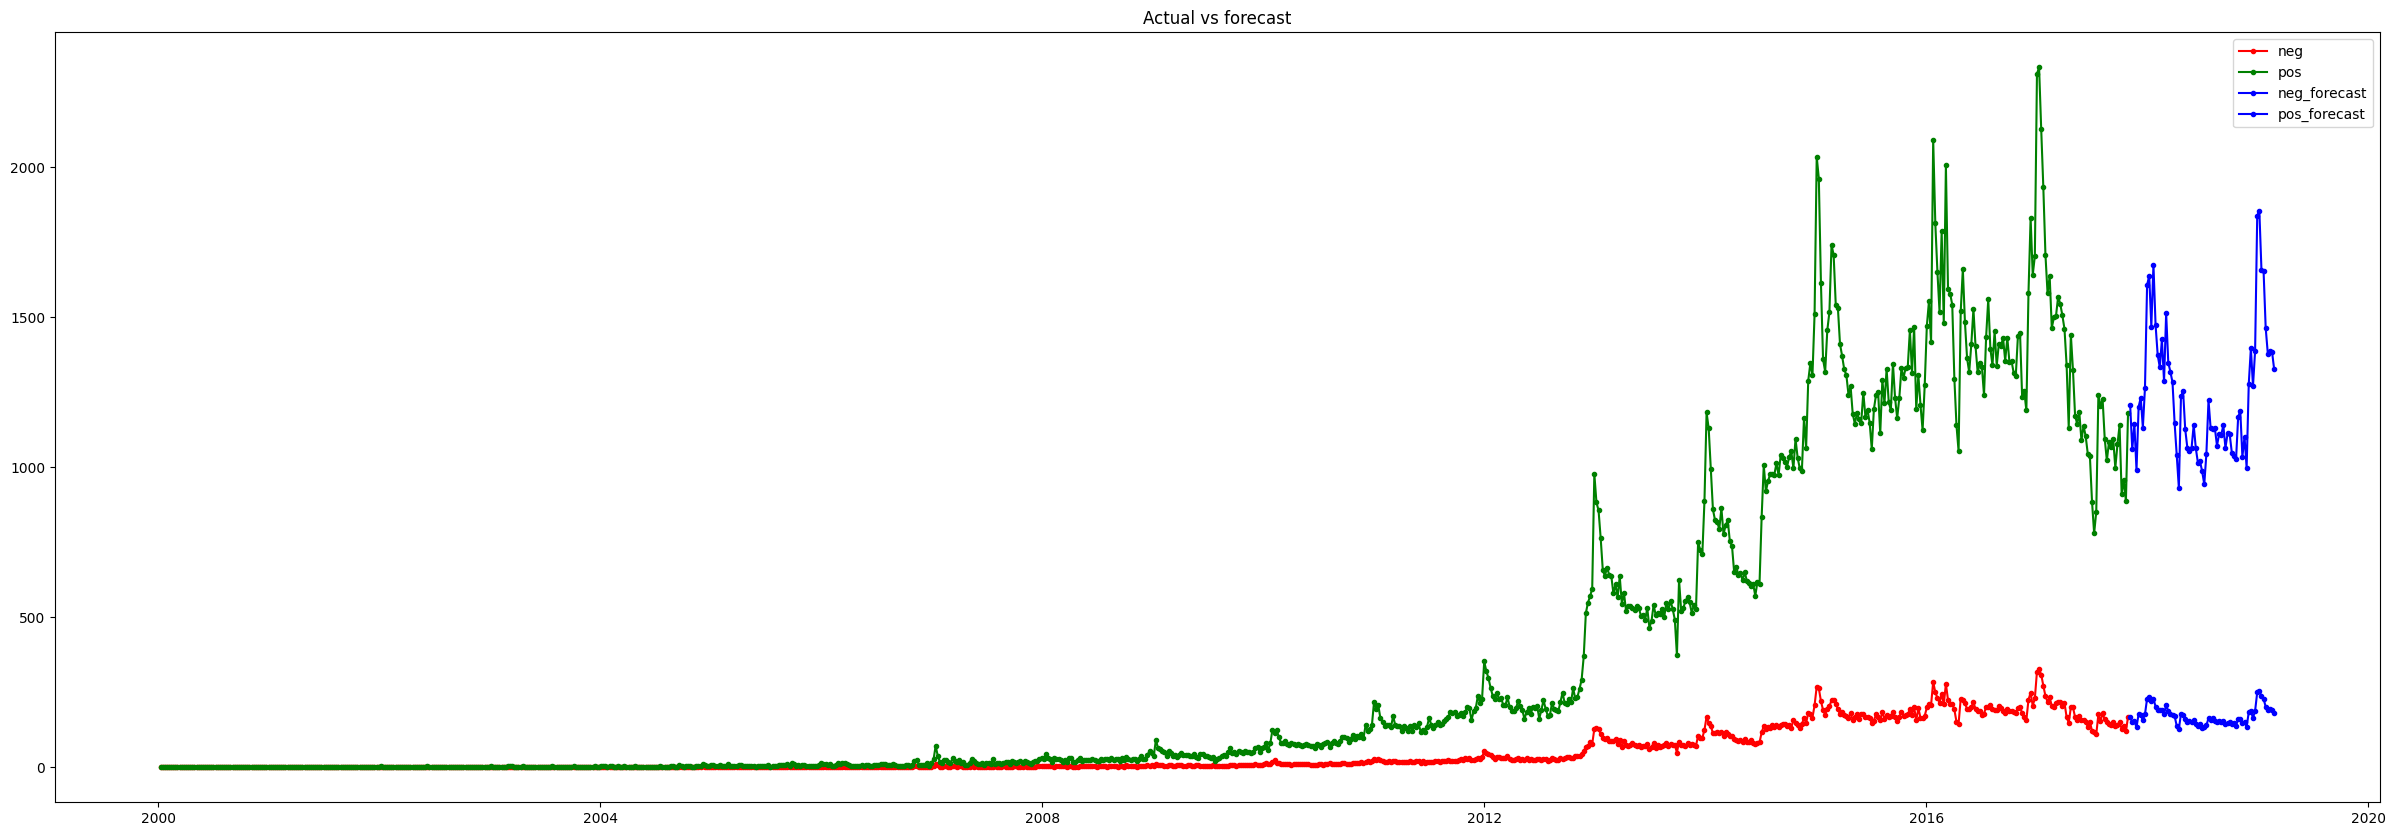

In [93]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast')
plt.plot(train['neg'],marker = '.', label = 'neg', color = 'red')
plt.plot(train['pos'],marker = '.', label = 'pos', color = 'g')
plt.plot(train1,marker = '.', label = 'neg_forecast', color = 'b')
plt.plot(train2,marker = '.', label = 'pos_forecast', color = 'b')
plt.legend()

In [94]:
pos_rmse = np.sqrt(mean_squared_error(test['pos'], train2[:-20]))
neg_rmse = np.sqrt(mean_squared_error(test['pos'], train1[:-20]))

res = pd.DataFrame({'Sentiments':['Pos', 'neg'], 'RMSE':[pos_rmse, neg_rmse]})
res

### <div class="alert alert-info">Interpretation
**- From both visualization as well as the error values of forcast data we can see the SARIMA model is giving good forcast results and the positive and negative reviews are increasing over period but the positive reviews are inresing in more percent compare to negative review**</div>

### Time series analysis of the price of the sector

In [96]:
df.head(200)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0470536454,crocheting for dummies by karen manthey susan ...,Bendy,5.0,1.092010e+09,2004-08-09,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.008,0.820,0.172,0.9945,2004,8
1,1,pos,0470536454,very helpful,Amazon Customer,4.0,1.491437e+09,2017-04-06,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.244,0.756,0.4754,2017,4
2,2,pos,0470536454,easy to understand and a prompt service too,Amazon Customer,5.0,1.489450e+09,2017-03-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.674,0.326,0.4404,2017,3
3,3,neutral,0470536454,my girlfriend use quite often,Christopher Burnett,4.0,1.487030e+09,2017-02-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000,2017,2
4,4,pos,0470536454,arrived as described very happy,Amazon Customer,5.0,1.485648e+09,2017-01-29,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.500,0.500,0.6115,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,neg,0470536454,i purchased this book for my granddaughter who...,B. Workman,2.0,1.293840e+09,2011-01-01,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Neg,0.103,0.897,0.000,-0.5423,2011,1
196,196,pos,0470536454,i have been crocheting a long time i am not a ...,L. M.,5.0,1.285027e+09,2010-09-21,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.112,0.772,0.116,0.3094,2010,9
197,197,pos,0470536454,this was a book that my wife had wanted and wa...,C. C.,5.0,1.281053e+09,2010-08-06,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.951,0.049,0.1779,2010,8
198,198,pos,0470536454,i enjoy the entire dummy series the authors sp...,Donna M. Leahy,5.0,1.278202e+09,2010-07-04,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",NaN,Wiley Publishing,Pos,0.000,0.674,0.326,0.7003,2010,7


In [97]:
df.describe()

,Unnamed: 0,overall,unixReviewTime,neg,neu,pos,compound,year,month
count,1.227993e+06,1.227993e+06,1.227993e+06,1.227993e+06,1.227993e+06,1.227993e+06,1.227993e+06,1.227993e+06,1.227993e+06
mean,8.253024e+05,4.275182e+00,1.439488e+09,3.996157e-02,6.710199e-01,2.879172e-01,5.376905e-01,2.015143e+03,6.203203e+00
std,3.967577e+05,1.223479e+00,6.414194e+07,8.133320e-02,2.264800e-01,2.388459e-01,4.460416e-01,2.060841e+00,3.611902e+00
min,0.000000e+00,1.000000e+00,9.470304e+08,0.000000e+00,0.000000e+00,0.000000e+00,-9.992000e-01,2.000000e+03,1.000000e+00
25%,5.088220e+05,4.000000e+00,1.407629e+09,0.000000e+00,5.700000e-01,1.210000e-01,3.612000e-01,2.014000e+03,3.000000e+00
50%,8.536510e+05,5.000000e+00,1.450224e+09,0.000000e+00,7.250000e-01,2.260000e-01,6.597000e-01,2.015000e+03,6.000000e+00
75%,1.161119e+06,5.000000e+00,1.485648e+09,5.400000e-02,8.210000e-01,4.000000e-01,8.807000e-01,2.017000e+03,9.000000e+00
max,1.472917e+06,5.000000e+00,1.538525e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.018000e+03,1.200000e+01


In [98]:
df.isnull().sum()

Unnamed: 0             0
Class                  0
asin                   0
reviewText           378
reviewerName          49
overall                0
unixReviewTime         0
reviewTime             0
title                  0
category               0
price             252205
brand               9969
Sentiment              0
neg                    0
neu                    0
pos                    0
compound               0
year                   0
month                  0
dtype: int64

Replacing the $(dollar) sign from the price to blank to convert the column into a int dataframe from str dataframe

In [99]:
df['price'] = df['price'].str.replace('$', '')

Replacing the NaN values with a space

In [100]:
df['price'] = df['price'].str.replace('NaN', '')

Filling empty places with 0

In [101]:
df['price'].fillna('', inplace=True)

In [102]:
df['price'] = df['price'].replace('', '0')


In [103]:
df.head(100)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0470536454,crocheting for dummies by karen manthey susan ...,Bendy,5.0,1.092010e+09,2004-08-09,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.008,0.820,0.172,0.9945,2004,8
1,1,pos,0470536454,very helpful,Amazon Customer,4.0,1.491437e+09,2017-04-06,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.000,0.244,0.756,0.4754,2017,4
2,2,pos,0470536454,easy to understand and a prompt service too,Amazon Customer,5.0,1.489450e+09,2017-03-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.000,0.674,0.326,0.4404,2017,3
3,3,neutral,0470536454,my girlfriend use quite often,Christopher Burnett,4.0,1.487030e+09,2017-02-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000,2017,2
4,4,pos,0470536454,arrived as described very happy,Amazon Customer,5.0,1.485648e+09,2017-01-29,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.000,0.500,0.500,0.6115,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,pos,0470536454,easy to read understand,Billie Tribitt,5.0,1.413158e+09,2014-10-13,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.000,0.508,0.492,0.4404,2014,10
96,96,neutral,0470536454,very informational,Sandra Cassell Fisher,5.0,1.412640e+09,2014-10-07,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000,2014,10
97,97,pos,0470536454,so very helpful for a non crafty pearson,helen johnson,5.0,1.412208e+09,2014-10-02,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.000,0.640,0.360,0.5222,2014,10
98,98,pos,0470536454,very good,skyking,5.0,1.411862e+09,2014-09-28,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",0,Wiley Publishing,Pos,0.000,0.238,0.762,0.4927,2014,9


Converting the column from str data type to int data type 

In [104]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
default_value = 0.0
df['price'] = df['price'].fillna(default_value)

# convert price column to float type
df['price'] = df['price'].astype(float)


In [105]:
df['price'] = df['price'].astype(float).round().astype(int)


Filling up all the null values(0) with the standard mean of the data to get a stationary dataset

In [106]:
mean_price = df['price'].mean()
std_dev_price = df['price'].std()
null_count = df['price'].isnull().sum()
rand_prices = np.random.normal(loc=mean_price, scale=std_dev_price, size=null_count)
df['price'].fillna(pd.Series(rand_prices), inplace=True)
print(df)

         Unnamed: 0    Class        asin  \
0                 0      pos  0470536454   
1                 1      pos  0470536454   
2                 2      pos  0470536454   
3                 3  neutral  0470536454   
4                 4      pos  0470536454   
...             ...      ...         ...   
1227988     1472909      pos  B0002E2AK2   
1227989     1472911      pos  B0002E2AK2   
1227990     1472913      neg  B0002DVMC0   
1227991     1472915      pos  B0002DVMC0   
1227992     1472917      pos  B0002DVMC0   

                                                reviewText  \
0        crocheting for dummies by karen manthey susan ...   
1                                             very helpful   
2              easy to understand and a prompt service too   
3                            my girlfriend use quite often   
4                          arrived as described very happy   
...                                                    ...   
1227988  works perfectly for me i did

In [107]:
mean_price = df['price'][df['price'] != 0].mean()
std_price = df['price'][df['price'] != 0].std()
df['price'] = df['price'].apply(lambda x: np.random.normal(mean_price, std_price) if x == 0 else x)

print(df)

         Unnamed: 0    Class        asin  \
0                 0      pos  0470536454   
1                 1      pos  0470536454   
2                 2      pos  0470536454   
3                 3  neutral  0470536454   
4                 4      pos  0470536454   
...             ...      ...         ...   
1227988     1472909      pos  B0002E2AK2   
1227989     1472911      pos  B0002E2AK2   
1227990     1472913      neg  B0002DVMC0   
1227991     1472915      pos  B0002DVMC0   
1227992     1472917      pos  B0002DVMC0   

                                                reviewText  \
0        crocheting for dummies by karen manthey susan ...   
1                                             very helpful   
2              easy to understand and a prompt service too   
3                            my girlfriend use quite often   
4                          arrived as described very happy   
...                                                    ...   
1227988  works perfectly for me i did

In [108]:
df.head(100)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,0,pos,0470536454,crocheting for dummies by karen manthey susan ...,Bendy,5.0,1.092010e+09,2004-08-09,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",76.458870,Wiley Publishing,Pos,0.008,0.820,0.172,0.9945,2004,8
1,1,pos,0470536454,very helpful,Amazon Customer,4.0,1.491437e+09,2017-04-06,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",35.656768,Wiley Publishing,Pos,0.000,0.244,0.756,0.4754,2017,4
2,2,pos,0470536454,easy to understand and a prompt service too,Amazon Customer,5.0,1.489450e+09,2017-03-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",20.333417,Wiley Publishing,Pos,0.000,0.674,0.326,0.4404,2017,3
3,3,neutral,0470536454,my girlfriend use quite often,Christopher Burnett,4.0,1.487030e+09,2017-02-14,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",57.537437,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000,2017,2
4,4,pos,0470536454,arrived as described very happy,Amazon Customer,5.0,1.485648e+09,2017-01-29,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",34.411219,Wiley Publishing,Pos,0.000,0.500,0.500,0.6115,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,pos,0470536454,easy to read understand,Billie Tribitt,5.0,1.413158e+09,2014-10-13,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",-20.817092,Wiley Publishing,Pos,0.000,0.508,0.492,0.4404,2014,10
96,96,neutral,0470536454,very informational,Sandra Cassell Fisher,5.0,1.412640e+09,2014-10-07,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",58.152357,Wiley Publishing,Pos,0.000,1.000,0.000,0.0000,2014,10
97,97,pos,0470536454,so very helpful for a non crafty pearson,helen johnson,5.0,1.412208e+09,2014-10-02,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",33.263889,Wiley Publishing,Pos,0.000,0.640,0.360,0.5222,2014,10
98,98,pos,0470536454,very good,skyking,5.0,1.411862e+09,2014-09-28,wiley publishers crocheting for dummies revised,"['Musical Instruments', 'Instrument Accessorie...",-69.906721,Wiley Publishing,Pos,0.000,0.238,0.762,0.4927,2014,9


### Time series analysis of price using Facebook Prophet 

In [109]:
df.to_csv("pricefinal.csv")

In [110]:
data=pd.read_csv('pricefinal.csv')

In [111]:
data1=data[['reviewTime','price']]

In [112]:
import prophet

In [113]:
from prophet import Prophet

In [114]:
data1.head()

,reviewTime,price
0,2004-08-09,76.458870
1,2017-04-06,35.656768
2,2017-03-14,20.333417
3,2017-02-14,57.537437
4,2017-01-29,34.411219


In [115]:
model= Prophet()

In [116]:
data1.columns=['ds','y']

In [117]:
data1.head()

,ds,y
0,2004-08-09,76.458870
1,2017-04-06,35.656768
2,2017-03-14,20.333417
3,2017-02-14,57.537437
4,2017-01-29,34.411219


In [118]:
model.fit(data1)

13:59:14 - cmdstanpy - INFO - Chain [1] start processing
14:00:54 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
model

In [120]:
future = model.make_future_dataframe(periods=3650)
future.tail()

,ds
9260,2028-09-26
9261,2028-09-27
9262,2028-09-28
9263,2028-09-29
9264,2028-09-30


In [121]:
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9260,2028-09-26,23.428420,-26.328311,73.796403
9261,2028-09-27,23.407369,-29.898443,77.988380
9262,2028-09-28,23.390638,-29.573637,73.209925
9263,2028-09-29,23.506396,-27.765079,76.065806
9264,2028-09-30,23.322935,-26.764817,76.301926


<Axes: title={'center': 'Actual vs Forecast'}, xlabel='ds'>

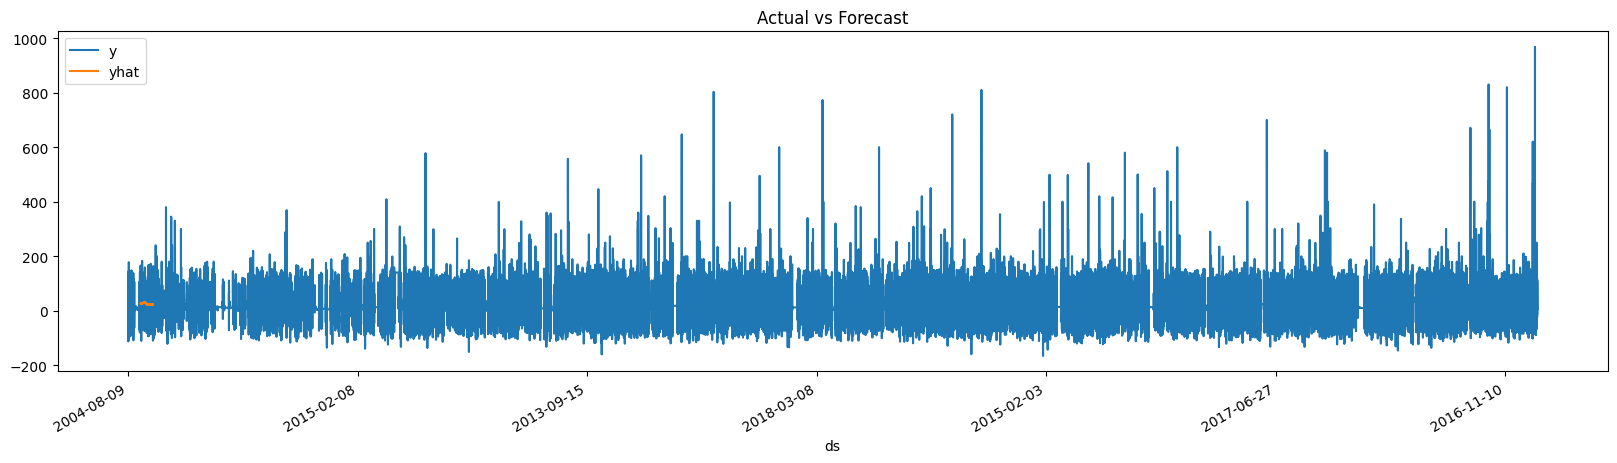

In [123]:
ax = (data1.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
forecast.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

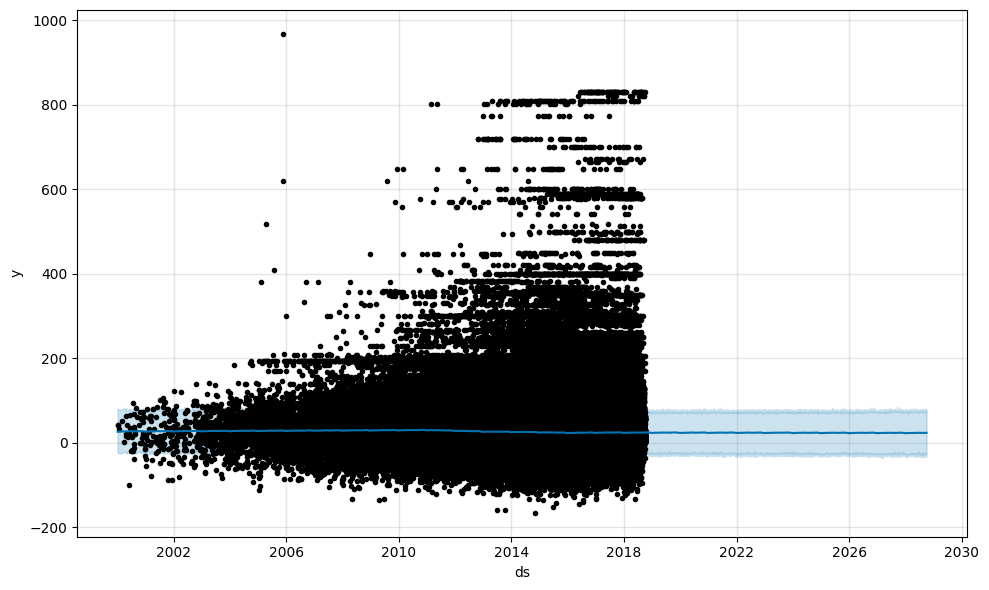

In [124]:
fig1 = model.plot(forecast, uncertainty=True)

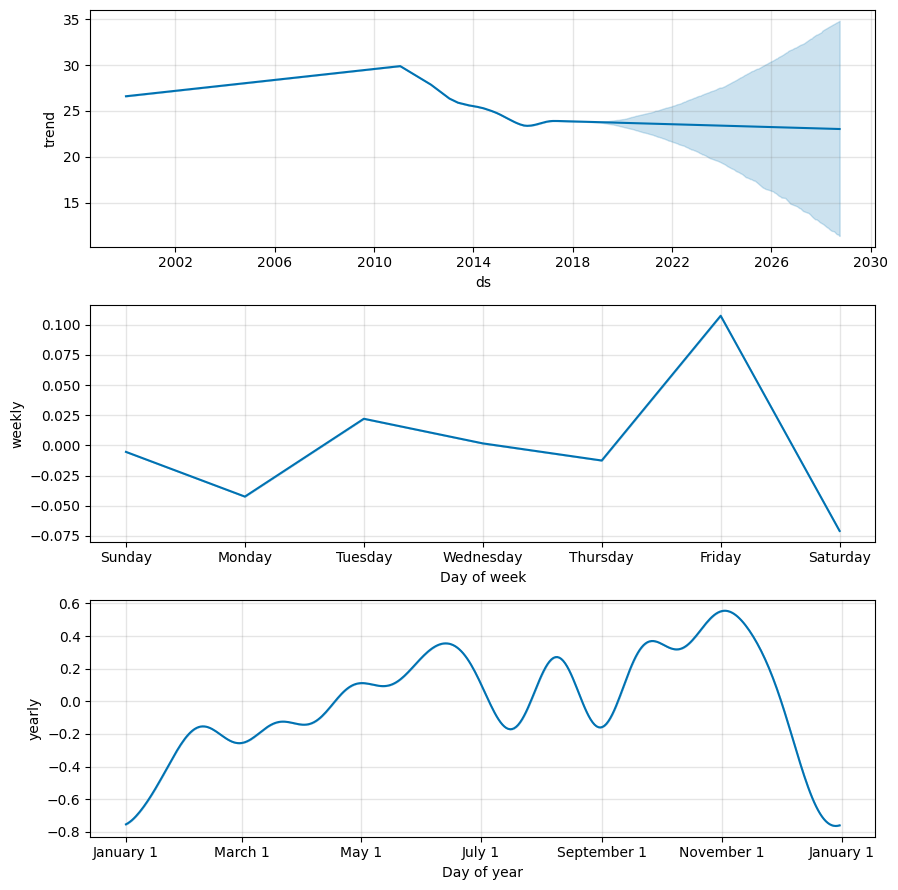

In [125]:
fig2 = model.plot_components(forecast)

# Analysis Completed